### Time series data, how is it different from "regular" data?

In [ ]:
import pandas as pd
data = {
    'subject_id': ['S1', 'S2', 'S3'],
    'heart_rate': [72, 68, 81],
    'step_count': [2, 5, 1],
    'body_temperature': [36.6, 36.7, 36.8]
}
df = pd.DataFrame(data)
print(df)


  subject_id  heart_rate  step_count  body_temperature
0         S1          72           2              36.6
1         S2          68           5              36.7
2         S3          81           1              36.8


In [ ]:
import pandas as pd
data = {
    'subject_id': ['S1', 'S1', 'S1', 'S2', 'S2', 'S2', 'S3', 'S3', 'S3'],
    'timestamp': [
        '2024-12-01 10:00:00', '2024-12-01 10:01:00', '2024-12-01 10:02:00',
        '2024-12-01 10:00:00', '2024-12-01 10:01:00', '2024-12-01 10:02:00',
        '2024-12-01 10:00:00', '2024-12-01 10:01:00', '2024-12-01 10:02:00',
    ],
    'heart_rate': [72, 75, 78, 68, 70, 72, 80, 82, 84],
    'step_count': [0, 2, 5, 1, 3, 6, 0, 4, 8]
}

df = pd.DataFrame(data)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index(['subject_id', 'timestamp'], inplace=True)

print(df)


                                heart_rate  step_count
subject_id timestamp                                  
S1         2024-12-01 10:00:00          72           0
           2024-12-01 10:01:00          75           2
           2024-12-01 10:02:00          78           5
S2         2024-12-01 10:00:00          68           1
           2024-12-01 10:01:00          70           3
           2024-12-01 10:02:00          72           6
S3         2024-12-01 10:00:00          80           0
           2024-12-01 10:01:00          82           4
           2024-12-01 10:02:00          84           8


In [ ]:
df_long = df.reset_index()
print(df_long)

  subject_id           timestamp  heart_rate  step_count
0         S1 2024-12-01 10:00:00          72           0
1         S1 2024-12-01 10:01:00          75           2
2         S1 2024-12-01 10:02:00          78           5
3         S2 2024-12-01 10:00:00          68           1
4         S2 2024-12-01 10:01:00          70           3
5         S2 2024-12-01 10:02:00          72           6
6         S3 2024-12-01 10:00:00          80           0
7         S3 2024-12-01 10:01:00          82           4
8         S3 2024-12-01 10:02:00          84           8


In many cases it will be beneficial to create a DataFrame per feature, with timestemps as columns, like this:

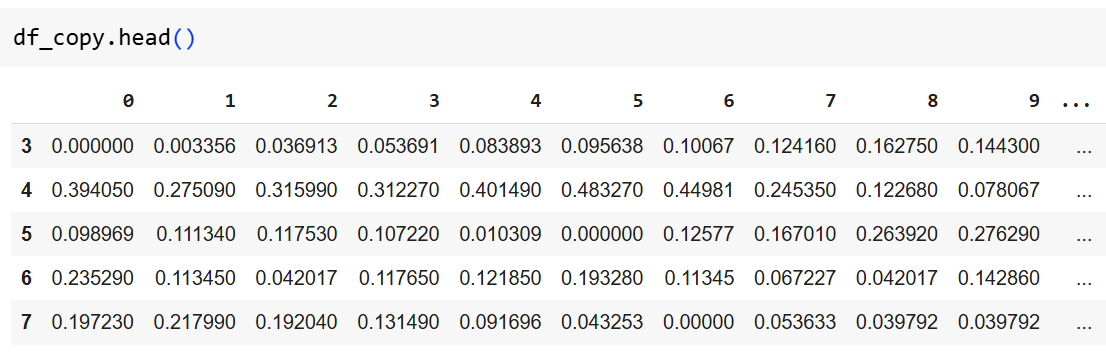

<h4> Time series can be

- Univariate, a single variable recorded over time, or
- Multivariate, multiple variables recorded over time

In this lesson we will focus on univariate time series only.   

### Simulating time series data

##### Step1: define the boundries

Create a time index that represents your desired sampling frequency and length

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

start = 0
stop = 100
number_of_points = 10**3
t = np.linspace(start, stop, number_of_points)

##### Step2: Define trend

In [ ]:
slope = 0.1
trend = slope * t

Trend can be any function of t. In this lesson we will focus on linear trends.

##### Step3: define seasonality

Create repeating patterns based on sine or cosine functions.

seasonality
(
𝑡
)
=
𝐴
⋅
sin
⁡
(
2
𝜋
𝑓
𝑡
+
𝜙
)

In [ ]:
amplitude = 2
period = 20
seasonality = amplitude * np.sin(2 * np.pi * t / 20)

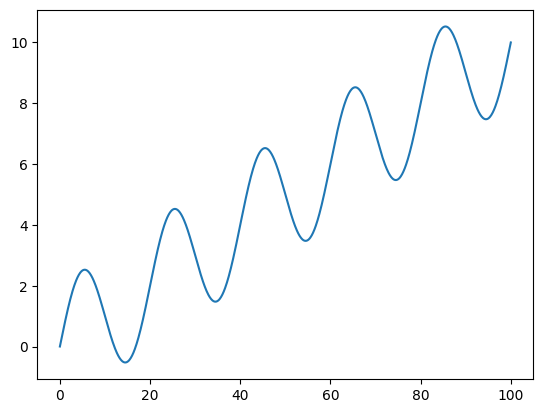

In [ ]:
plt.plot(t, trend+seasonality)
plt.show()

##### Step4: Add noise

In [ ]:
mean_ = 0
std_ = 0.5
noise = np.random.normal(mean_, std_, len(t))

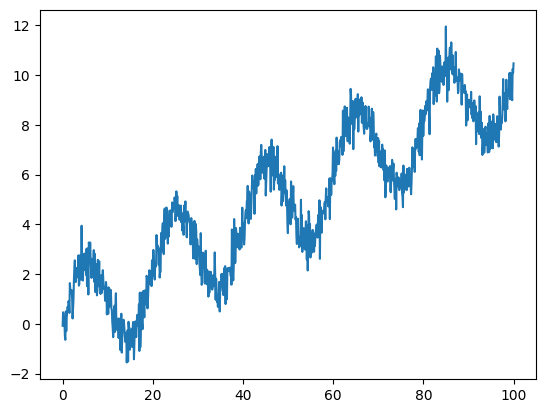

In [ ]:
plt.plot(t, trend+seasonality+noise)
plt.show()

TADAAA

We have a signal with trend and seasonality

Now if we want we can add all sort of goodies
For example, we can add spikes:

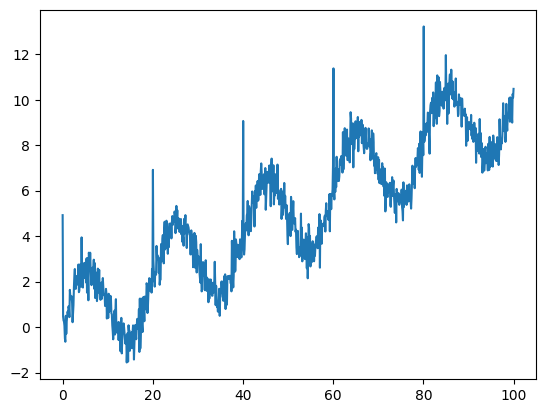

In [ ]:
spikes = np.zeros_like(t)
spikes[::200] = 5

plt.plot(t, trend+seasonality+noise+spikes)
plt.show()

Add Anomalies: Inject sudden, unusual changes

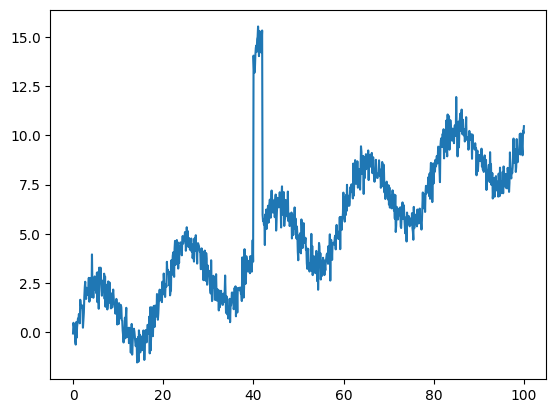

In [ ]:
anomalies = np.zeros_like(t)
start_anom, stop_anom = 400, 420
anomalies[start_anom:stop_anom] = 10

plt.plot(t, trend+seasonality+noise+anomalies)
plt.show()

One of the common tasks in time series analysis is decomposition and trend analysis.

What are the underlying components (trend, seasonality, noise) of the time series?

#### Optional: Store the synthetic data in a DataFrame

In [ ]:
data = trend+seasonality+noise
# fake time stemps :)
time_index = pd.date_range(start="2024-11-11", periods=number_of_points, freq="H")  # hourly data
df = pd.DataFrame({'Time': time_index, 'Data': data})
df.head()

<ipython-input-14-27d9d54bcd0d>:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_index = pd.date_range(start="2024-11-11", periods=number_of_points, freq="H")  # hourly data


,Time,Data
0,2024-11-11 00:00:00,0.507671
1,2024-11-11 01:00:00,-0.337465
2,2024-11-11 02:00:00,0.102459
3,2024-11-11 03:00:00,-0.109218
4,2024-11-11 04:00:00,-0.152603


### Time Series Analysis

#### Generate synthetic eye movement data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def generate_eye_tracker_data_with_saccades(num_subjects, num_timesteps):
    data = []
    for subject in range(num_subjects):
        # Simulate baseline with small random fluctuations
        eye_positions = np.cumsum(np.random.normal(0, 0.25, num_timesteps))

        # Add trend (simulating a broken eye tracker)
        trend = np.linspace(0, 5, num_timesteps)  # Linear trend
        eye_positions += trend

        # Introduce saccades: large, sudden changes at random intervals
        num_saccades = np.random.randint(1, 2)  # Random number of saccades per subject
        saccade_indices = np.random.choice(num_timesteps, num_saccades, replace=False)
        saccade_magnitudes = np.random.uniform(4, 8, num_saccades)

        for idx, magnitude in zip(saccade_indices, saccade_magnitudes):
            eye_positions[idx:] += magnitude if np.random.rand() > 0.5 else -magnitude

        # Introduce missing data
        missing_indices = np.random.choice(num_timesteps, size=np.random.randint(1, 5), replace=False)
        eye_positions[missing_indices] = np.nan

        data.append(eye_positions)

    return pd.DataFrame(data, index=[f"Subject_{i+1}" for i in range(num_subjects)],
                        columns=[f"TS{t+1}" for t in range(num_timesteps)])


In [ ]:
num_subjects = 10
df = generate_eye_tracker_data_with_saccades(num_subjects, 50)
df.head()

,TS1,TS2,TS3,TS4,TS5,TS6,TS7,TS8,TS9,TS10,...,TS41,TS42,TS43,TS44,TS45,TS46,TS47,TS48,TS49,TS50
Subject_1,-0.204692,0.122194,-0.058814,-4.121731,-4.285611,-4.432769,-4.264864,-3.992604,-3.597951,-3.933113,...,0.543285,1.150255,1.535335,1.851864,2.006906,2.282224,2.587598,2.590665,NaN,3.242620
Subject_2,-0.036797,0.041912,-0.083413,-0.141771,0.158260,0.018795,-0.191074,-0.073491,-0.071317,-0.148269,...,3.145199,3.435858,3.344809,3.672703,3.754877,3.882804,-3.450689,-3.349234,-2.962909,NaN
Subject_3,-0.054440,-0.150167,-0.036117,0.196590,0.487456,0.586936,0.596417,0.336809,0.369837,0.726185,...,5.009757,4.887726,NaN,4.946637,11.031529,10.782655,10.609577,10.563042,10.552652,10.510648
Subject_4,-0.056552,-0.188010,-0.252679,0.123293,0.099807,0.645641,1.008643,1.090907,1.472812,1.959599,...,5.334454,5.161666,5.290573,5.287862,-0.503072,0.088800,0.240155,-0.007147,0.089909,-0.023531
Subject_5,0.086657,0.102568,0.718134,0.674345,0.707317,0.619218,0.114310,0.509698,0.787802,0.436131,...,9.164195,8.798536,8.683258,8.237282,8.175927,8.501542,8.901871,8.661572,8.736784,8.949205


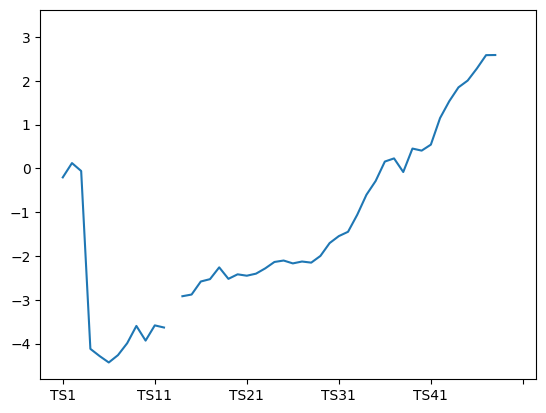

In [ ]:
df.loc['Subject_1'].plot()
plt.show()

In [ ]:
df.isna().sum().sum() #or isnull().sum() or info()

28

##### 1. Handle missing data

In [ ]:
# Performs linear interpolation along each row
cleaned_df = df.interpolate(axis=1, method='linear')
# In case of missing values at the start/end of the row
cleaned_df = cleaned_df.bfill(axis=1).ffill(axis=1)

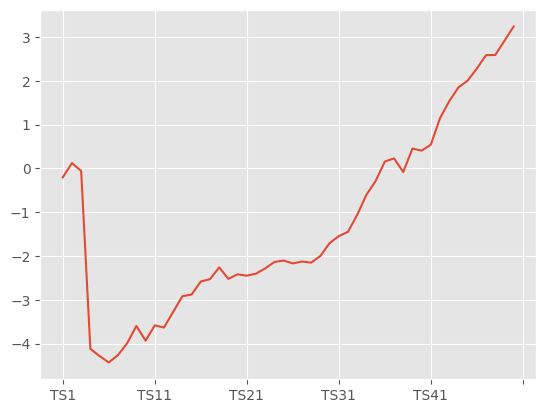

In [ ]:
plt.style.use('ggplot')
cleaned_df.loc['Subject_1'].plot()
plt.show()

##### 2. Smoothing

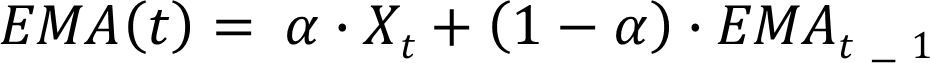

In [ ]:
def calculate_ma_ema(df, window_size=3, alpha=0.3):
  # OpI: Smoothing with running mean
  ma_df = df.apply(lambda row: np.convolve(row, np.ones(window_size)/window_size, mode='same'), axis=1)
  # OpII: Smoothing with exponential moving average
  ema_df = df.apply(lambda row: pd.Series(row).ewm(alpha=alpha).mean().to_numpy(), axis=1)
  result = pd.concat({"MA": ma_df, "EMA": ema_df}, axis=0)
  result.index.names = ["Smoothing", "Subject"]
  return result, ma_df, ema_df


In [ ]:
def plot_ma_vs_ema(smoothed_data, subject):
    subject_ma = smoothed_data.loc["MA"].loc[subject]
    subject_ema = smoothed_data.loc["EMA"].loc[subject]
    plt.figure(figsize=(12, 6))
    plt.plot(subject_ma, label="Moving Average", linestyle='--')
    plt.plot(subject_ema, label="Exponential Moving Average", linestyle='-.')
    plt.plot(df.loc[subject], label="Original Data", linestyle='-')
    plt.title(f"MA vs EMA - {subject}")
    plt.xlabel("Timestep")
    plt.ylabel("Eye Position (X)")
    plt.legend()
    plt.show()


EMAt = α⋅x
t
​
 +(1−α)⋅EMA
t−1
​


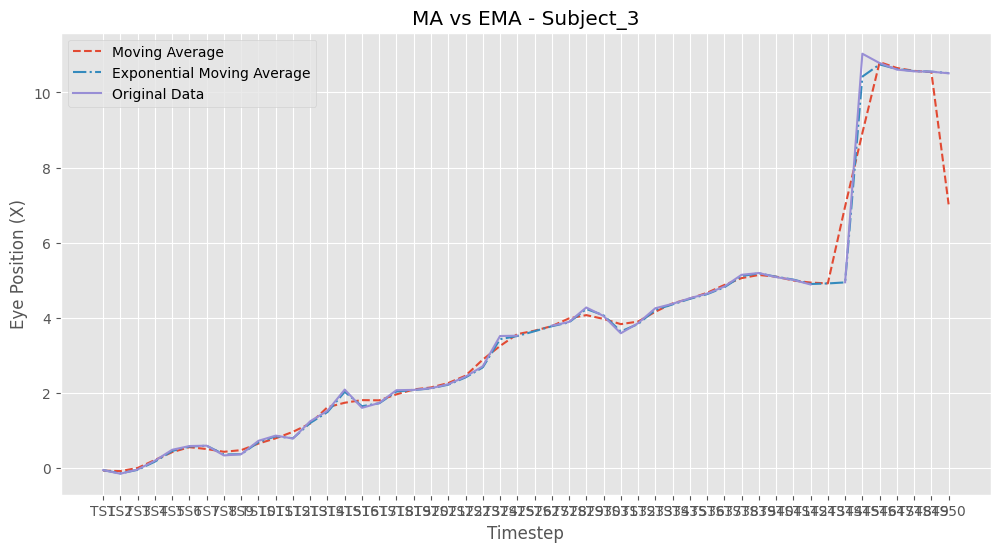

In [ ]:
smoothed_data, ma_df, ema_df = calculate_ma_ema(cleaned_df,3, alpha=0.9)
plot_ma_vs_ema(smoothed_data, 'Subject_3')

##### Housekeeping :)

In [ ]:
def series_to_dataframe(series_with_arrays, num_timesteps):
    # Create a DataFrame where each column corresponds to a timestep
    dataframe = pd.DataFrame(
        {f"TS{t+1}": series_with_arrays.apply(lambda arr: arr[t]) for t in range(num_timesteps)}
    )
    # Retain the original index from the Series
    dataframe.index = series_with_arrays.index
    dataframe.index.name = "Subject"
    return dataframe


In [ ]:
smoothed_ma_df = series_to_dataframe(ma_df, 50)

##### 3. Detect Outliers

In [ ]:
def detect_outliers_in_time(df, threshold=3): # examine rows
    z_scores = (df - df.mean(axis=1)) / df.std(axis=1)
    return (np.abs(z_scores) > threshold)

def detect_outliers_across_subjects(df, threshold=3): # examine columns
    z_scores = (df - df.mean(axis=0)) / df.std(axis=0)
    return (np.abs(z_scores) > threshold)

row_outliers = detect_outliers_in_time(cleaned_df)
column_outliers = detect_outliers_across_subjects(cleaned_df)


In [ ]:
def summarize_and_print_outliers(outliers_df, axis="row"):
    if axis == "row":
        print("Row-wise Outliers (Per Subject):")
        for subject, row in outliers_df.iterrows():
            outlier_timesteps = row[row].index.tolist()
            if outlier_timesteps:
                print(f"  {subject}: Outliers at timesteps {outlier_timesteps}")
        else:
            print("  No outliers found.")
    elif axis == "column":
        print("\nColumn-wise Outliers (Per Timestep):")
        for timestep in outliers_df.columns:
            outlier_subjects = outliers_df[timestep][outliers_df[timestep]].index.tolist()
            if outlier_subjects:
                print(f"  {timestep}: Outliers for subjects {outlier_subjects}")
        else:
            print("  No outliers found.")

summarize_and_print_outliers(row_outliers, axis="row")
summarize_and_print_outliers(column_outliers, axis="column")


Row-wise Outliers (Per Subject):
  No outliers found.

Column-wise Outliers (Per Timestep):
  No outliers found.


##### 4. Detect trend and seasonality

In [ ]:
def generate_eye_tracker_data_with_saccades(num_subjects, num_timesteps):
    data = []
    for subject in range(num_subjects):
        # Simulate baseline with small random fluctuations
        eye_positions = np.cumsum(np.random.normal(0, 0.25, num_timesteps))

        # Add trend (simulating a broken eye tracker)
        trend = np.linspace(0, 5, num_timesteps)  # Linear trend
        eye_positions += trend

        # Add Heartbeat (sine wave)
        heartbeat = 2 * np.sin(2 * np.pi * np.linspace(0, 1, num_timesteps))  # 1-cycle sine wave
        eye_positions += heartbeat

        # Introduce saccades: large, sudden changes at random intervals
        num_saccades = np.random.randint(1, 2)  # Random number of saccades per subject
        saccade_indices = np.random.choice(num_timesteps, num_saccades, replace=False)
        saccade_magnitudes = np.random.uniform(4, 8, num_saccades)

        for idx, magnitude in zip(saccade_indices, saccade_magnitudes):
            eye_positions[idx:] += magnitude if np.random.rand() > 0.5 else -magnitude

        data.append(eye_positions)

    return pd.DataFrame(data, index=[f"Subject_{i+1}" for i in range(num_subjects)],
                        columns=[f"TS{t+1}" for t in range(num_timesteps)])


In [ ]:
df = generate_eye_tracker_data_with_saccades(num_subjects, num_timesteps)

In [ ]:
def remove_trend(df):
    def detrend_row(row):
        time_indices = np.arange(len(row))
        # Fit a linear model (polynomial of degree 1) as we did in the numpy notebook
        linear_fit_coefficients = np.polyfit(time_indices, row, 1)
        print('trend coefficients: ', linear_fit_coefficients)

        # Subtract the trend values from the original row
        trend_values = np.polyval(linear_fit_coefficients, time_indices)
        detrended_row = row - trend_values
        return detrended_row

    # for each row apply the detrending function
    detrended_data = df.apply(detrend_row, axis=1)

    return detrended_data


In [ ]:
detrended_data = remove_trend(smoothed_ma_df)

trend coefficients:  [-0.17169094  1.14433874]
trend coefficients:  [ 0.24922376 -1.99802778]
trend coefficients:  [ 0.1552558 -0.4430185]
trend coefficients:  [ 0.05398916 -6.10274226]
trend coefficients:  [ 0.26974117 -2.22508716]
trend coefficients:  [ 0.34243989 -0.03661514]
trend coefficients:  [0.13562322 5.09218019]
trend coefficients:  [ 0.23517176 -1.14760965]
trend coefficients:  [-0.04121429 -1.42399682]
trend coefficients:  [-0.10692538 -0.89455163]


In [ ]:
linear_fits = df.apply(lambda row: np.polyfit(np.arange(len(row)), row, 1), axis=1)

In [ ]:
def plot_tredn(df, transformed_df, subject = 'Subject_1'):
    subject_ = df.loc[subject]
    transformed_subject = transformed_df.loc[subject]
    fit_params = linear_fits.loc[subject]
    timesteps = np.arange(len(subject_ma))
    fitted_line = np.polyval(fit_params, timesteps)
    plt.figure(figsize=(12, 6))
    plt.plot(timesteps, fitted_line, label=f"Fitted Line (y = {fit_params[0]:.2f}x + {fit_params[1]:.2f})",
             linestyle='-.')
    plt.plot(subject_, label="Moving Average", linestyle='--')
    plt.plot(transformed_subject, label="Detrend", linestyle='-')
    plt.xlabel("Timestep")
    plt.ylabel("Eye Position (X)")
    plt.legend()
    plt.show()


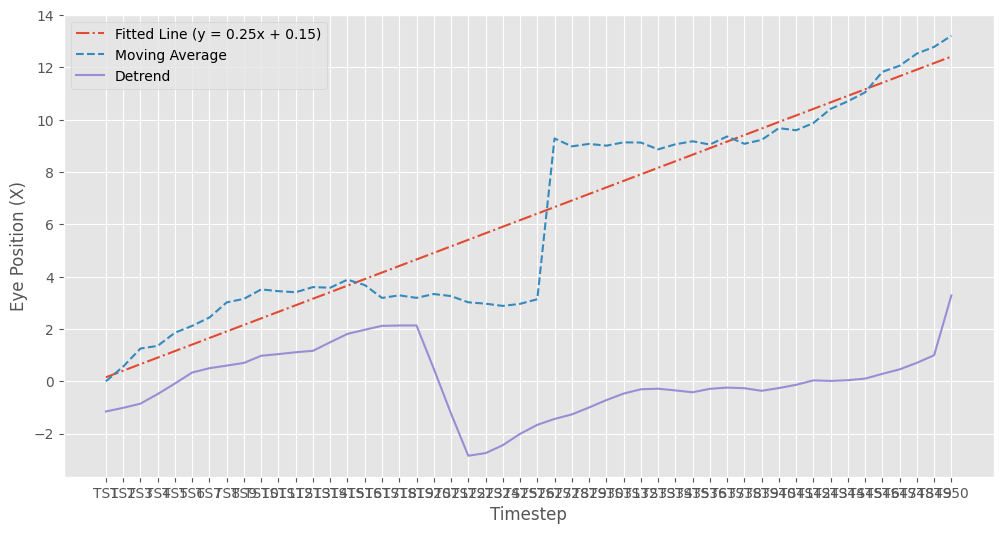

In [ ]:
plot_tredn(df, detrended_data, subject = 'Subject_1')

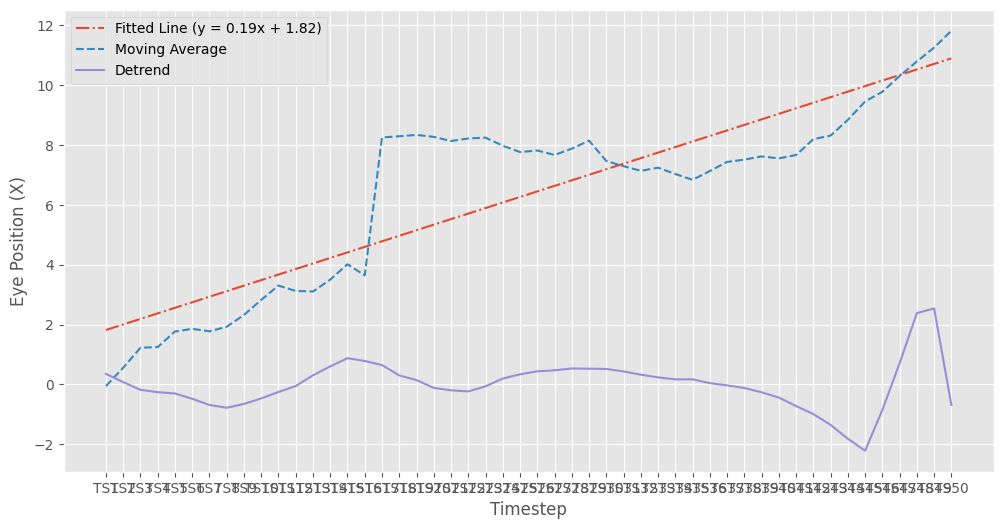

In [ ]:
plot_tredn(df, detrended_data, subject = 'Subject_3')